In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [38]:
from matplotlib import image

#### 2) Reading image and displaying it

In [39]:
#Reding image
sample =image.imread("Sample Image.jpg") 

In [40]:
#NumPy array of the image
image_array = np.asarray(sample)

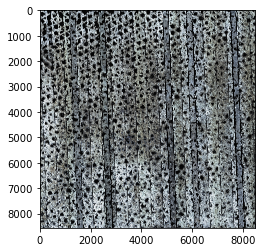

In [41]:
#Plotting the array as image
plt.imshow(image_array);

#### 3) Converting image to grayscale

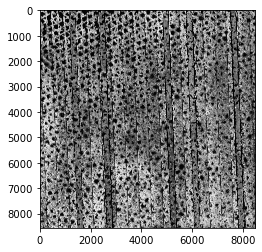

In [42]:
#Using the 'weighted method' for converting RGB image to grayscale.
gray_image =np.dot(image_array[:,:,:3],[0.2989, 0.5870, 0.1140])
gray_image = gray_image.astype("uint8")
#Plotting the image
plt.imshow(gray_image, cmap='gray');

#### 4) Performing thresholding of the image

In [43]:
#Binary thresholding
th, threshed = cv.threshold(gray_image,60,255,cv.THRESH_BINARY)

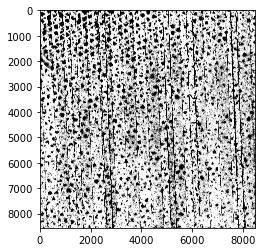

In [44]:
#Plotting the image
plt.imshow(threshed , cmap='gray')
plt.savefig("threshed.jpg", dpi=1200);

#### 5) Plotting countours to identify voids

In [45]:
#Finding countours
contours, hierarchy = cv.findContours(threshed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [46]:
#Total number of countours
print(len(contours))

256218


In [47]:
#Finding number of countours having appropriate area(that of voids)
s1 = 1000
s2 = 1000000
xcnts = []
for cnt in contours:
    if s1<cv.contourArea(cnt)<s2:
        xcnts.append(cnt)

In [48]:
#Number of voids
print(len(xcnts))

1380


#### 6) Finding percent porosity

In [49]:
#Area of voids
area = 0
for cnt in xcnts:
    area = area + cv.contourArea(cnt)
print(area)

18565770.5


In [50]:
#Total area of image
height, width = gray_image.shape
total_area = height * width
print(total_area)

72751314


In [51]:
#Finding porosity
percent_porosity = 100 * area / total_area
print(percent_porosity)

25.519498520672766


In [52]:
thresh_copy=threshed.copy()

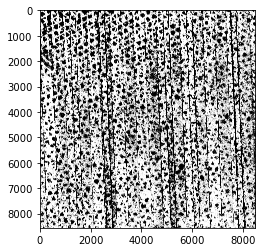

In [53]:
cv.drawContours(thresh_copy, xcnts, -1, (0, 255, 0), thickness=5, lineType=cv.LINE_AA)
plt.imshow(thresh_copy, cmap="gray")
plt.savefig("thresh_copy.jpg", dpi=800)